#### Explore AI Academy: Classification Project


<div style="font-size: 35px">
    <font color='Blue'> <b>Analysing News Articles Dataset</b></font> 

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview**](#chapter1)
    * [1.1 Introduction**](#section_1_1)
        * [1.1.1 Problem Statement**](#sub_section_1_1_1)
    * [1.2 Objectives**](#section_1_2)
* <b>[2. Importing Packages**](#chapter2)
* <b>[3. Loading Data**](#chapter3)
* <b>[4. Data Cleaning**](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)**](#chapter5)
* <b>[6. Feature Engineering**](#chapter6)</b>
* [7. Modeling](#chapter7)
* [8. Model Performance](#chapter8)
* <b>[10. Conclusion**](#chapter10)</b>
* [11. References](#chapter11)

> <b> Objective of the Project:</b> Clearly state what the project aims to achieve or what problem it intends to solve. This helps to immediately orient readers to the purpose of your analysis.

> <b> Data Source:</b> Mention where the data comes from, including specifics about the dataset such as the period it covers, who collected it, and any important features or variables it includes. This establishes the context and relevance of the data.

> <b> Importance of the Study:</b> Explain why this project is important. Discuss its relevance or impact in its field, whether it’s improving a business process, advancing scientific understanding, or influencing policy decisions.

> <b> Key Questions or Hypotheses:</b> Outline the main questions you aim to answer or hypotheses you plan to test. This sets clear goals for your analysis and what the audience can expect to learn.

> <b> Methodology Overview:</b> Provide a brief overview of the methods and techniques you plan to use in your analysis. This doesn’t need to be detailed here but should give a taste of the analytical approach and tools.

> <b> Structure of the Notebook:</b> Describe the layout of the notebook. Explain the sections or parts of the analysis to help readers navigate through the content.

> <b> Expected Outcomes:</b> If applicable, mention what kind of results or findings you anticipate. This could be specific insights, predictive model performance, or impact assessment.

- #### 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>

### 1.2 Objectives <a class="anchor" id="section_1_2"></a>

+ To apply exploratory data analysis.
+ To implement feature engineering techniques to extract meaningful information.
+ To model and assess various supervised machine learning algorithms for the prediction ....

## 2. Importing Packages <a class="anchor" id="chapter2"></a>

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in July 2022 containing data available in the United States.

+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [9]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_validate

from sklearn.feature_selection import chi2

# set plot style
sns.set_theme()

# Libraries for Handing Errors
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [5]:
import requests
import joblib 

## 3. Loading Data <a class="anchor" id="chapter3"></a>

In [7]:
# Read the train dataset
train = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/refs/heads/main/Data/processed/train.csv')
train.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [15]:
# Load the datasets
train_data = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/refs/heads/main/Data/processed/train.csv')  
test_data = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/refs/heads/main/Data/processed/test.csv')    

# Displaying basic information and the first few rows of each dataset 
train_info = train_data.info()
train_head = train_data.head()
test_info = test_data.info()
test_head = train_data.head()

train_info, train_head, test_info, test_head

# Drop the 'url' column
print('Dropping URL column...')
train_data.drop(columns=['url'], inplace=True, errors='ignore')
test_data.drop(columns=['url'], inplace=True, errors='ignore')

# Display the first few rows to verify
print(train_data.head())
print(test_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB
Dropping URL column...
                                           headlines  \
0  RBI revises definition of politically-exposed ...

In [28]:
# Combine text columns for training set
train_data['combined_text'] = train_data['headlines'] + ' ' + train_data['description'] + ' ' + train_data['content']

# Combine text columns for test set
test_data['combined_text'] = test_data['headlines'] + ' ' + test_data['description'] + ' ' + test_data['content']

In [29]:
# Convert all text in the 'combined_text' column to lowercase
print ('Lowering case...')
train_data['combined_text'] = train_data['combined_text'].str.lower()
test_data['combined_text'] = test_data['combined_text'].str.lower()

# Define a function to remove punctuation and numbers from the 'combined_text' column
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
    
# Apply the remove_punctuation_numbers function to the 'post' column
train_data['combined_text'] = train_data['combined_text'].apply(remove_punctuation_numbers)
test_articles['combined_text'] = test_articles['combined_text'].apply(remove_punctuation_numbers)

print(train_data['combined_text'])
print(test_data['combined_text'])

Lowering case...
Cleaning punctuation...
0       rbi revises definition of politicallyexposed p...
1       ndtv q net profit falls  to rs  crore impacted...
2       akasa air ‘well capitalised’ can grow much fas...
3       india’s current account deficit declines sharp...
4       states borrowing cost soars to  highest so far...
                              ...                        
5515    samsung sends out invites for ‘unpacked ’ new ...
5516    google pixel  pro accidentally appears on offi...
5517    amazon ad on google search redirects users to ...
5518    elon musk’s x previously twitter now worth les...
5519    apple’s ios  update released and here’s how it...
Name: combined_text, Length: 5520, dtype: object
0       nlc india wins contract for power supply to ra...
1       sbi clerk prelims exams dates announced; admit...
2       golden globes: michelle yeoh, will ferrell, an...
3       oneplus nord 3 at rs 27,999 as part of new pri...
4       adani family’s partners used ‘op

In [32]:
#This code uses `CountVectorizer` to convert the text data from the training and test sets into a matrix of token counts, while removing English stop words.

# Initialize CountVectorizer
vect = CountVectorizer(stop_words='english')

# training set
X_train = vect.fit_transform(train_data['combined_text'])

# only transform the test set
X_test = vect.transform(test_data['combined_text'])

In [34]:
#categorise y 

# Initialize LabelEncoder
from sklearn.calibration import LabelEncoder


le = LabelEncoder()

# training 
y_train = le.fit_transform(train_data['category'])

# only transform the test set
y_test = le.transform(test_data['category'])

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


# Step 1: Initialize the CountVectorize
vectorizer = CountVectorizer(stop_words='english', min_df= .1)


# Step 2: Group by class and combine the text
class_grouped = df.groupby('category')['combined'].apply(' '.join).reset_index()

classes = list(class_grouped['category'])
# Step 3: Get word counts for each class
word_counts = {}

for index, row in class_grouped.iterrows():
    # Transform the combined text into word counts
    counts = vectorizer.fit_transform([row['combined']])
    counts_array = counts.toarray()[0]  # Convert to array and take the first (and only) row
    words = vectorizer.get_feature_names_out()  # Get the words
    word_count_dict = dict(zip(words, counts_array))  # Combine words and counts

    # Step 4: Get the 10 most common words
    most_common = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]
    word_counts[row['category']] = most_common

plt.rcParams['figure.figsize'] = (20,5)
fig, ax = plt.subplots(nrows=1, ncols=5)

colours = ['steelblue','teal', '#FFBF00', 'darkgreen', 'gray']
# Print the most common words for each class

index = 0

for class_name, common_words in word_counts.items():
    w = []
    c = []
    for word, count in common_words:
        w.append(word)
        c.append(count)
        ax[index].set_title(f'{class_name}')
        
    c.reverse()
    w.reverse()
    max_value = max(c)
    alphas = [value / max_value for value in c]

    bars = ax[index].barh(w, c, color= colours[index])
    index += 1
    # Apply transparency
    for bar, alpha in zip(bars, alphas):
        bar.set_alpha(alpha)
fig.tight_layout()
plt.show()

KeyError: 'Column not found: combined'

In [20]:
train_data['type'] = 'train'
test_data['type'] = 'test'
df = pd.concat([train_data, test_data])

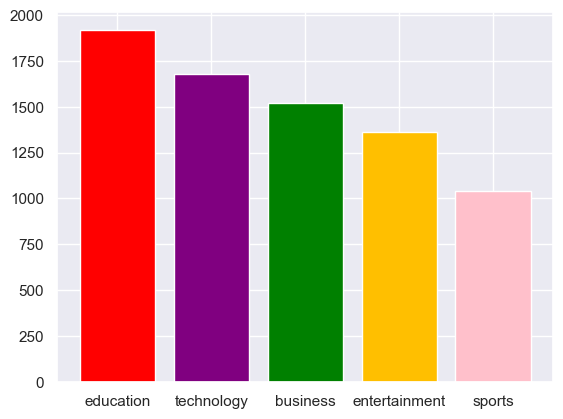

In [26]:
grouped = df.groupby(['category']).count().reset_index().sort_values(by = 'headlines', ascending = False)
plt.bar(grouped.category, grouped.headlines, color = ['red', 'purple', 'green', '#FFBF00', 'pink'])
plt.show()

In [8]:
# loading dataset

df.head(2) 

NameError: name 'df' is not defined

In [ ]:
# displays unlimited number of columns
pd.set_option("display.max_columns", None)

In [ ]:
# The copy of the dataframe
df_copy = df.copy()

In [ ]:
# Displays the number of rows and columns
df_copy.shape